In [25]:
import pandas as pd 
import numpy  as np
import matplotlib.pyplot as plt 

In [26]:
data = pd.read_csv('../dataset/headbrain.csv')

In [27]:
data.tail(5)

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170
236,2,2,3391,1120


In [28]:
x = data[["Gender","Head Size(cm^3)"]].values

Y = data["Brain Weight(grams)"].values.reshape(-1,1)
X = np.hstack((np.ones((x.shape[0],1)),x))

theta = np.random.randn(3,1)
m = X.shape[0]
m

237

In [29]:
def model(X,theta) : 
    return X @ theta

In [30]:
def cost_function(X,Y,theta) :
    error = model(X,theta) - Y
    return (1/(2*m)) * np.sum(error**2) 
#cost_function(X,Y,theta)

In [31]:
def gradient(X,Y,theta):
    error = model(X,theta) - Y
    return 1/m * X.T @ error
gradient(X,Y,theta)

array([[-5.74300815e+01],
       [-8.59263437e+01],
       [-1.98941763e+05]])

In [32]:
def gradient_descent(X,Y,theta, learning_rate = 1e-7 , iteration=10000) :
    cost_history = [] 
    for i in range(iteration) :
        theta -= learning_rate * gradient(X,Y,theta)
        cost_history.append(cost_function(X,Y,theta))
    return theta,cost_history

In [33]:
theta_min , cost_history = gradient_descent(X,Y,theta,1e-7,10)
y_predicted = model(X,theta_min)

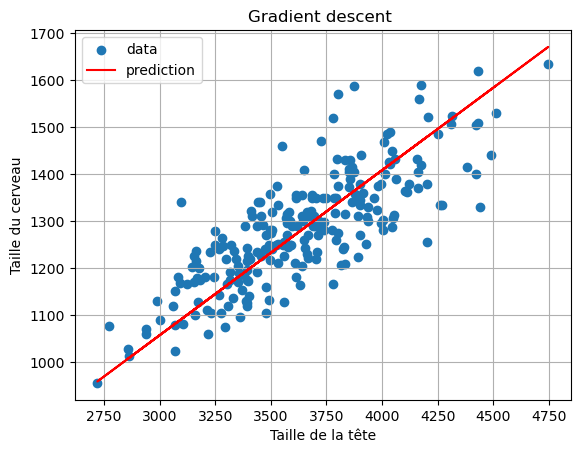

In [34]:
x = data["Head Size(cm^3)"].values.reshape(-1,1) 
plt.scatter(x,Y,label='data')
plt.plot(x,y_predicted,c='r',label='prediction')
plt.xlabel("Taille de la tête")
plt.ylabel("Taille du cerveau")
plt.title("Gradient descent ")
plt.grid(True)
plt.legend()

Text(0, 0.5, 'dicrease')

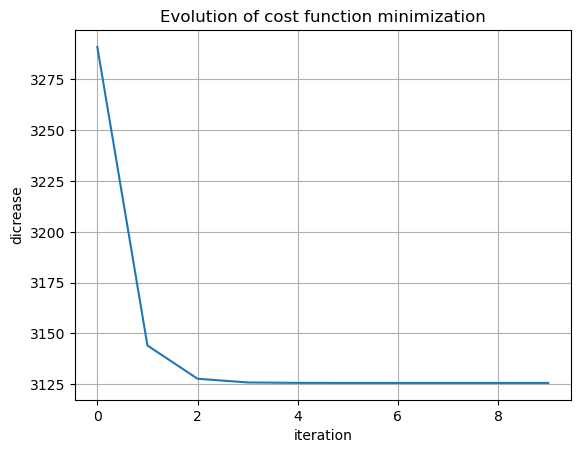

In [35]:
plt.plot(cost_history)
plt.grid(True) 
plt.title("Evolution of cost function minimization")
plt.xlabel("iteration")
plt.ylabel("dicrease")